# Importing Modules

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # this will take away the red dialog boxes in the output terminal

## Classification Problem.  Metrics Involve A Confusion Matrix

In [2]:
conf_matrix_sketch = pd.DataFrame([["True Positive", "False Positive"], ["False Negative", "True Negative"]], index = None)
conf_matrix_sketch

,0,1
0,True Positive,False Positive
1,False Negative,True Negative


## Reading data

In [3]:
training_data = pd.read_csv('Capstone #2 training data.csv') # First mentor meeting, don't specify the 'r' mode otherwise data will be a mess
testing_data = pd.read_csv('Capstone #2 test data.csv')

In [4]:
training_data.head() # Don't specify the print function and the DataFrame will be presented this way

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
training_data['ApplicantIncome'] = training_data['ApplicantIncome'].astype("float64")

In [7]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


It looks like there are 614 observations in total and the following columns have NaN values; Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History.  Before deciding what to do with the missing values, we will explore the data first.

# Exploratory Data Analysis

### Categorical Variables: Gender, Married, Dependents, Education, Self_Employed, Credit_History, Property Area

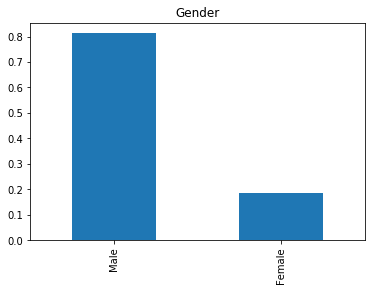

In [8]:
training_data["Gender"].value_counts(normalize=True).plot.bar(title = 'Gender')
plt.show()

There are more males than females.  Therefore the NaN values will be imputed with males.

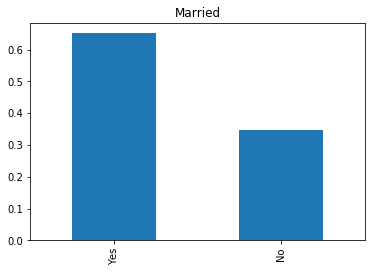

In [9]:
training_data["Married"].value_counts(normalize=True).plot.bar(title='Married')
plt.show()

There are more married applicants.  Therefore the NaN values will be imputed with married applicants

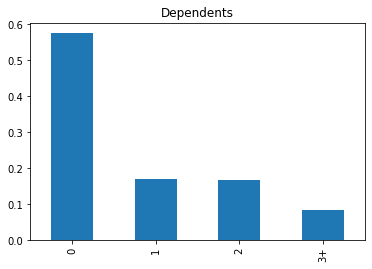

In [10]:
training_data["Dependents"].value_counts(normalize=True).plot.bar(title='Dependents')
plt.show()

The majority have no dependents, therefore the NaN values will be imputed with 0 dependents.

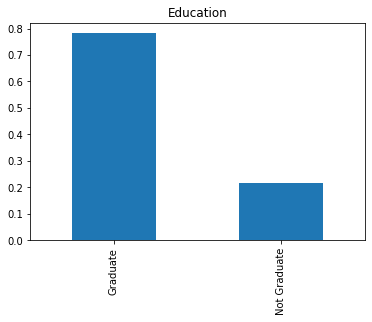

In [11]:
training_data["Education"].value_counts(normalize=True).plot.bar(title='Education')
plt.show()

The majority are graduates.  But there are no NaN values here, therefore no imputation is required.

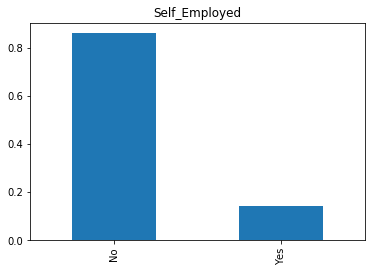

In [12]:
training_data["Self_Employed"].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()

The majority of applicants are not self-employed, therefore the NaN values will be imputed with not self_employed

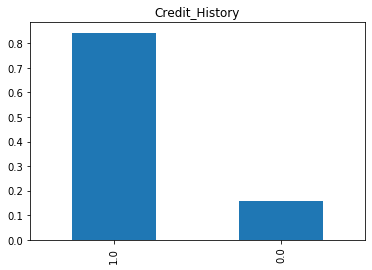

In [13]:
training_data["Credit_History"].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

The credit history majority has 1.0.  Therefore the NaN values will be imputed as 1.0

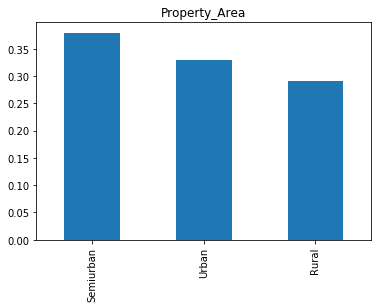

In [14]:
training_data["Property_Area"].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

There are no NaN values for property area, therefore no imputation is required.  Most are Semiurban, but the distribution is fairly even.

### Numerical Variables: ApplicantIncome, CoapplicantIncome, Loan_Amount, Loan_Amount_Term

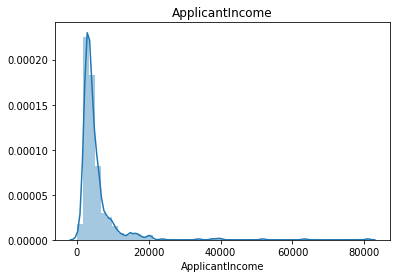

In [15]:
sns.distplot(training_data['ApplicantIncome']) # Add a Title?
plt.title("ApplicantIncome")
plt.show() # For tree based models, no logarithmic distributions are neccessary.

The applicant income shows a curve with a right tail.  There are quite a few outliers to the right.  These can easily be fixed by taking a logarithmic scale where the higher datapoints will be moderated.

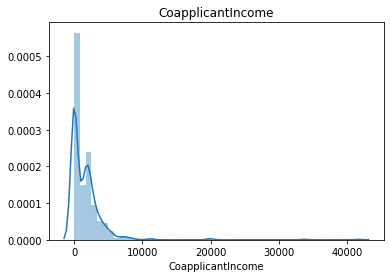

In [16]:
sns.distplot(training_data['CoapplicantIncome'])
plt.title("CoapplicantIncome")
plt.show() 

The coapplicant income follows the same pattern. There is a double hump in this curve, but albet with more data this will change into the same figure as the applicant income.  This can also be treated the same by taking the logarithmic scale.

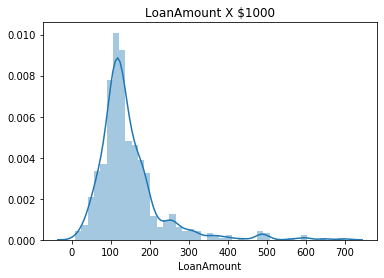

In [17]:
sns.distplot(training_data['LoanAmount'])
plt.title("LoanAmount X $1000")
plt.show()

The loan amount is also a curve with a tail to the right.

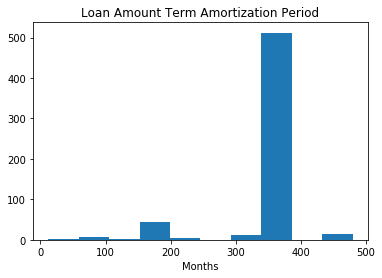

In [18]:
plt.hist(training_data['Loan_Amount_Term']) # Howcome this one is different?
plt.title("Loan Amount Term Amortization Period")
plt.xlabel("Months")
plt.show()

Most people seem to apply to have the loan for a term of 360 months.

In [19]:
training_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

The numerical values here are rather discrete than continious as in the applicant and coapplicant income.  Since the most common value is 360.0, this will be the value imputed for the NaN values of this column.

In [20]:
Gender = pd.crosstab(training_data['Gender'], training_data['Loan_Status'])
Married = pd.crosstab(training_data['Married'], training_data['Loan_Status'])
Dependents = pd.crosstab(training_data['Dependents'], training_data['Loan_Status'])
Education = pd.crosstab(training_data['Education'], training_data['Loan_Status'])
Self_Employed = pd.crosstab(training_data['Self_Employed'], training_data['Loan_Status'])
Credit_History = pd.crosstab(training_data['Credit_History'], training_data['Loan_Status'])
Property_Area = pd.crosstab(training_data['Property_Area'], training_data['Loan_Status'])

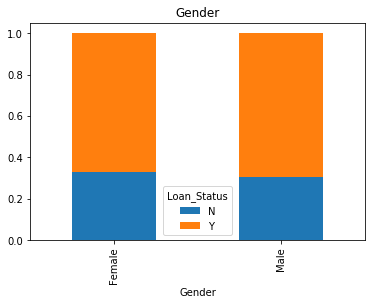

In [21]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Gender")
plt.show()

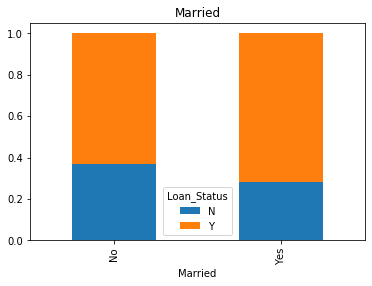

In [22]:
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Married")
plt.show()

More applicants are not married.  Therefore all missing values will be imputed as not married.  There is a clear pattern that applicants who are married stand a higher chance at getting granted a loan.

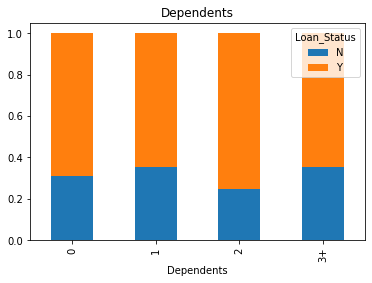

In [23]:
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Dependents")
plt.show()

There is no clear pattern between whether or not a loan is granted and the number of dependents.  Values that are missing or display a '3+' will be replaced/imputed with a value of 3.

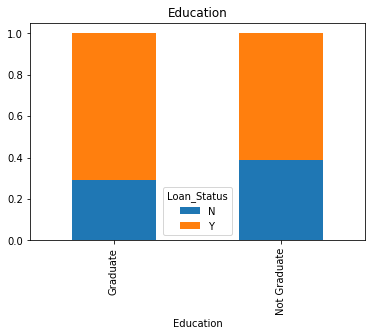

In [24]:
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Education")
plt.show()

No values need to be imputed for education since there are 614 entries.  There is a clear pattern that more loans are granted to educated applicants.

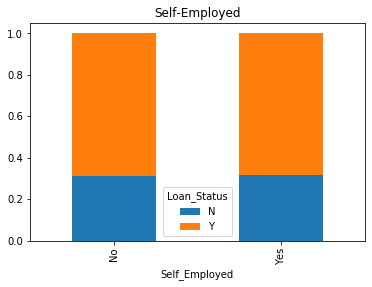

In [25]:
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Self-Employed")
plt.show()

There is an independent relationship between getting granted a loan and whether or not the applicant is self-employed.

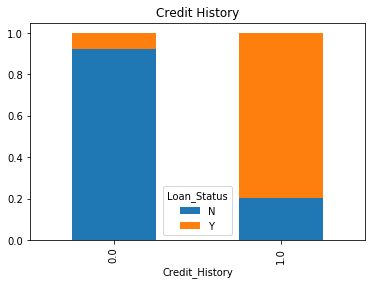

In [26]:
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Credit History")
plt.show()

Credit history is judged as binary.  Bad credit is 0.0 and good credit is 1.0.  It is clear that applicants with bad credit will probably not be granted a loan.

***Does income affect an applicant's chances of getting a loan?  To answer this question, the income values need to be categorized and crosstab bar charts for income and loan status can be created to show this.***

Create a new column in the training data that categorizes the Applicant Income as Low, Medium, High or Very High.

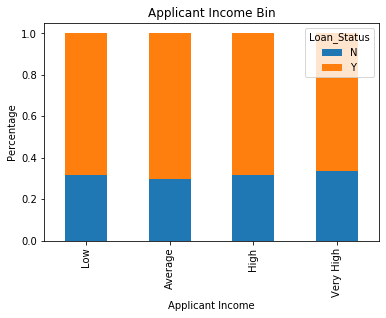

In [27]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
training_data['Income_bin'] = pd.cut(training_data['ApplicantIncome'], bins = bins, labels = group) # Add new column binning Applicant Income.
Income_bin = pd.crosstab(training_data['Income_bin'], training_data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Applicant Income Bin")
plt.xlabel("Applicant Income")
plt.ylabel("Percentage")
plt.show()

So far, it seems that income does not have a strong affect on an applicant's chances of being approved.  To make sure of this, the coapplicant income will be analyzed in a simmilar manor.  A new column summing the applicant and coapplicant incomes will be created and analyzed in a simmilar way to strongly support/refute the hypothesis that income affects chances of getting a loan.

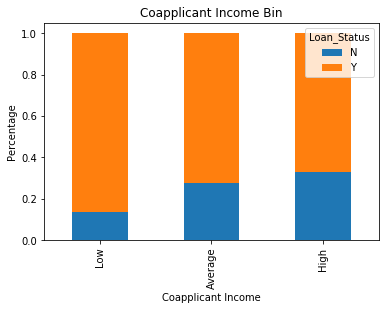

In [28]:
bins = [0, 1000, 3000, 42000]
group = ['Low', 'Average', 'High']
training_data['CoapplicantIncome_bin'] = pd.cut(training_data['CoapplicantIncome'], bins, labels = group)
CoapplicantIncome_bin = pd.crosstab(training_data['CoapplicantIncome_bin'], training_data['Loan_Status'])
CoapplicantIncome_bin.div(CoapplicantIncome_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Coapplicant Income Bin")
plt.xlabel("Coapplicant Income")
plt.ylabel("Percentage")
plt.show()

The relationship between coapplicant income and loan status is pretty clear that coapplicants with higher incomes are less likely to get a loan approved and those coapplicants with lower income are more likely to get approved a loan.

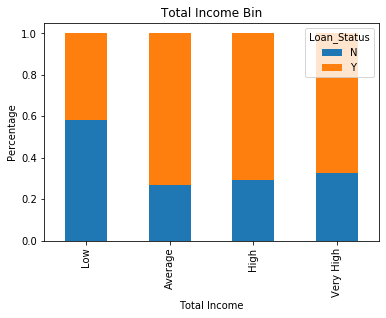

In [29]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
training_data['Total_Income_bin'] = training_data['ApplicantIncome'] + training_data['CoapplicantIncome']
training_data['Total_Income_bin'] = pd.cut(training_data['Total_Income_bin'], bins, labels = group)
Total_Income_bin = pd.crosstab(training_data['Total_Income_bin'], training_data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Total Income Bin")
plt.xlabel("Total Income")
plt.ylabel("Percentage")
plt.show()

The combination of applicant and coapplicant incomes show a clear relationship that if an applicants income is low, they are less likely to be approved for a loan.  However, if their income is average or higher, the relationship between loan status and income becomes independent.

The loan Amount veriable can be categorized and analyzed like the previous variables.  The next hypothesis to test is whether or not there is a relationship between Loan Term and loan status.  The hypothesis that follows is that applicants that want to borrow money for a shorter period of time will stand a higher chance at getting a loan.

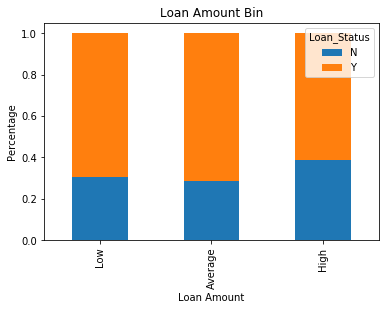

In [30]:
bins = [0, 100, 200, 700]
group = ['Low', 'Average', 'High']
training_data['LoanAmount_bin'] = pd.cut(training_data['LoanAmount'], bins, labels = group)
LoanAmount_bin = pd.crosstab(training_data['LoanAmount_bin'], training_data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Loan Amount Bin")
plt.xlabel("Loan Amount")
plt.ylabel("Percentage")
plt.show()

High loan amounts stand a lower chance at loan approval.  Therefore applicants asking for lower amounts will stand a higher chance at loan approval.

### Data Wrangling Steps
#### Step 1: Quantize the target varaible replacing 0 for No and 1 for Yes.
#### Step 2: Drop the bins from the training data set.
#### Step 3: Change the 3+ in the dependents column to 3.
#### Step 4: Deal with missing values and outliers.

### Step 1: Quantize the target variable replacing 0 for No and 1 for yes.

In [31]:
training_data['Loan_Status'].replace('Y', '1', inplace=True)
training_data['Loan_Status'].replace('N', '0', inplace=True)
training_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,CoapplicantIncome_bin,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,1,High,NaN,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,0,High,Average,Very High,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,1,Average,NaN,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,1,Average,Average,High,Average
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,1,High,NaN,High,Average


Now the Loan_Status column is replaced with 1's and 0's.

### Step 2: Drop the bins from the training data set.

In [32]:
training_data = training_data.drop(['Income_bin', 'CoapplicantIncome_bin', 'Total_Income_bin', 'LoanAmount_bin'], axis=1)

### Step 3: Change the 3+ in the dependents column to 3.

In [33]:
training_data['Dependents'].replace('3+', '3', inplace=True) #The same needs to be done for the test data as well.

### Using a heat correlation map

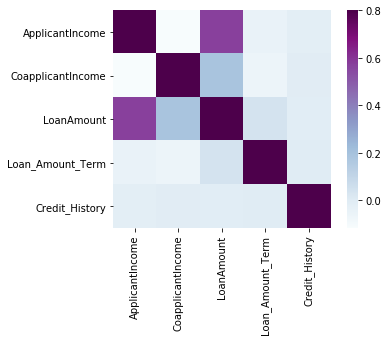

In [34]:
matrix = training_data.corr()
sns.heatmap(matrix, vmax=.8, square=True, cmap='BuPu')

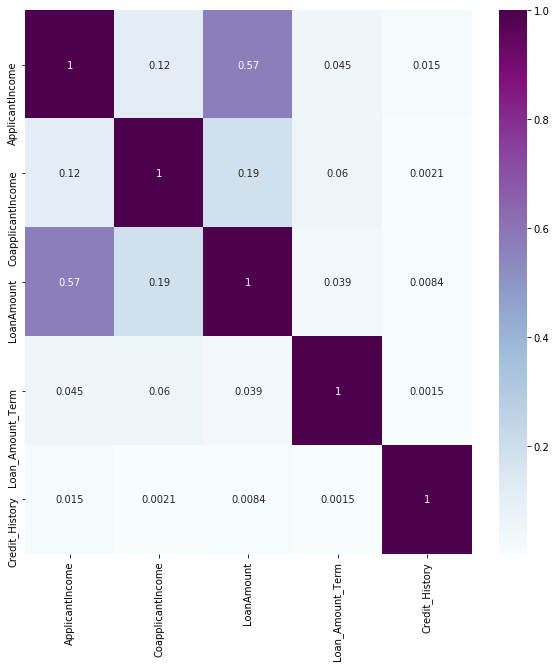

In [35]:
plt.figure(figsize = (10, 10))
training_data.corr().abs()
z = training_data.corr().abs()
sns.heatmap(data=z, annot=True, cmap='BuPu')

These correlation heatmaps show a weak correlation; r<0.70 between the loan amount and the applicant income.  Interestingly, there is also a weak correlation between the incomes of the applicant and coapplicants.

## Missing Values And Outliers

In [36]:
training_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The following features listed above with values greater than 0 have missing values.  These missing values need to be imputed.  For categorical variables like gender, married, self-employed, dependents and credit history the mode will be imputed.

In [37]:
training_data['Gender'].fillna(training_data['Gender'].mode()[0], inplace = True)
training_data['Married'].fillna(training_data['Married'].mode()[0], inplace = True)
training_data['Dependents'].fillna(training_data['Dependents'].mode()[0], inplace = True)
training_data['Credit_History'].fillna(training_data['Credit_History'].mode()[0], inplace = True)
training_data['Self_Employed'].fillna(training_data['Self_Employed'].mode()[0], inplace = True)

In [38]:
training_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Having taken care of the missing values for the categorical variables by filling them in with the mode.  Numerical variables like loan amount term and loan amount will be delt with separately below.

### Loan Amount Term

Following the loan amount term graph, the value counts should reveal the mode to be 360.0, which is the value to be imputed.

In [39]:
training_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [40]:
training_data['Loan_Amount_Term'].fillna(training_data['Loan_Amount_Term'].mode()[0], inplace = True)

### Loan Amount

The loan amount distribution was illustrated in the graph above.  The distribution has a right tail containing high outliers.  Because of this, the median will be used to impute the missing values instead of the mean.

In [41]:
training_data['LoanAmount'].fillna(training_data['LoanAmount'].median(), inplace = True)

Now all the missing values are taken care of.  As illustrated below.

In [42]:
training_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [43]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


### Finding other correlations

From the heat map previously used, only float64 types were used.  The Loan status column values can be converted to float64 and included on the correlation heat map.  The same will apply for dependents and property area and education.  Education will be quantized the same way Loan Status was with 1 in placement of Graduate and 0 in placement of Not Graduate.  The same was done with Self_Employed, Gender and Married.  This will reduce the number of increasing features when we call pd.get_dummies() to transform the remaining object datatypes into numerical values.  This will also reduce need for regularization as given by the C parameter in the Logistic Regression model.

In [44]:
training_data['Education'].replace('Graduate', '1', inplace=True) # Quantizing Education like was done with target variable.
training_data['Education'].replace('Not Graduate', '0', inplace=True)

training_data['Self_Employed'].replace('Yes', '1', inplace=True) # Quantizing Self_Employed like was done with target variable.
training_data['Self_Employed'].replace('No', '0', inplace=True)

training_data['Gender'].replace('Male', '1', inplace=True) # Quantizing Gender like was done with target variable.
training_data['Gender'].replace('Female', '0', inplace=True)

training_data['Married'].replace('Yes', '1', inplace=True) # Quantizing Married like was done with target variable.
training_data['Married'].replace('No', '0', inplace=True)

In [45]:
training_data['Loan_Status'] = training_data['Loan_Status'].astype("float64") # Changing types
training_data['Dependents'] = training_data['Dependents'].astype("float64")
training_data['Education'] = training_data['Education'].astype("float64")
training_data['Self_Employed'] = training_data['Self_Employed'].astype("float64")
training_data['Gender'] = training_data['Gender'].astype("float64")
training_data['Married'] = training_data['Married'].astype("float64")
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    float64
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    float64
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    float64
dtypes: float64(11), object(2)
memory usage: 62.5+ KB


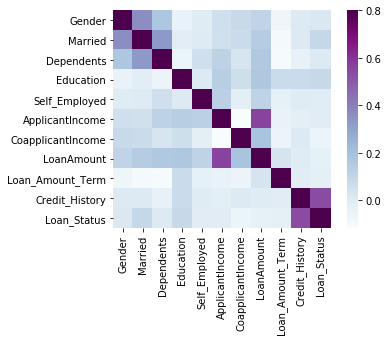

In [46]:
matrix = training_data.corr()
sns.heatmap(matrix, vmax=.8, square=True, cmap='BuPu')

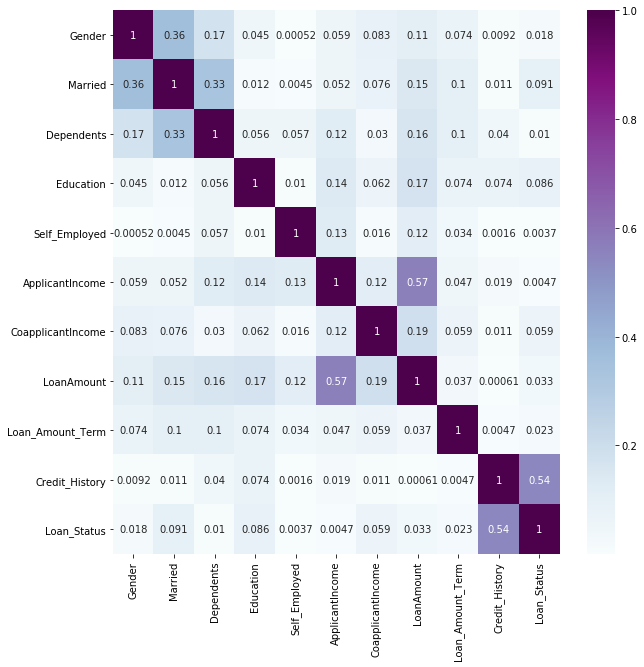

In [47]:
plt.figure(figsize = (10, 10))
training_data.corr().abs()
z = training_data.corr().abs()
sns.heatmap(data=z, annot=True, cmap='BuPu')
plt.savefig('Correlation Heatmap.png')

There is a weak correlation; r < 0.70 between credit history and loan status.  This is the strongest dependent variable for determining the value of the target variable; Loan_Status.

The last issue that needs to be delt with are the high outliers with applicant income, coapplicant income and loan amount.  These three features will be measured logarithmically and stored as variables for later use.  The logarithmic distribution moderates the extreme values causing the distribution to take on a normal distribution.

### Loan Amount

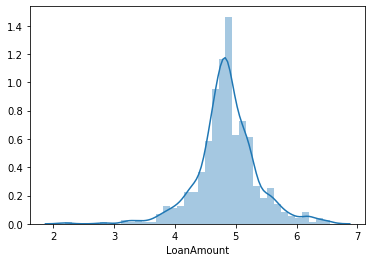

In [48]:
x = np.log(training_data['LoanAmount'])
sns.distplot(x)
plt.show()

### Applicant Income

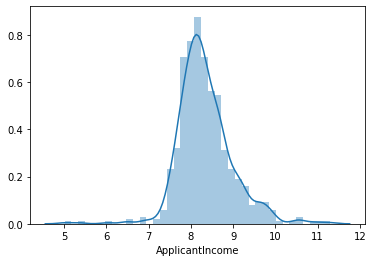

In [49]:
y = np.log(training_data['ApplicantIncome'])
sns.distplot(y)
plt.show()

### Coapplicant Income

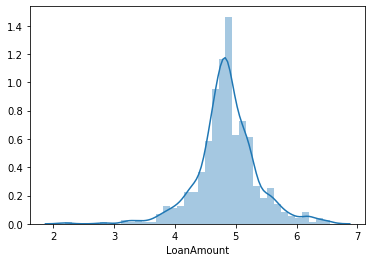

In [50]:
z = np.log(training_data['LoanAmount'])
sns.distplot(z)
plt.show()

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def run_regression_accuracy(X_train, y_train, X_test, y_test):   
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
    cm = confusion_matrix(y_test, y_pred)
    print('\nConfusion matrix: \n',cm)

    print('\nClassification report: \n',classification_report(y_test, y_pred))

    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
  
    return logreg

In [52]:
training_data.head() # Loan_ID can be dropped.
                     # Logistic Regresion in sklearn requires that the target variable is separated in y_variable; call y.  The remaining dataset will be called X.
                     # Categorical variables like Gender, Self-Employed and Married need to be quantized for analysis.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,128.0,360.0,1.0,Urban,1.0
1,LP001003,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,Rural,0.0
2,LP001005,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,Urban,1.0
3,LP001006,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,Urban,1.0
4,LP001008,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,Urban,1.0


## Building A Logistic Regression Model

### Data Processing Steps:
1. Quantize the property area variable with rural as 0 and city as 2. 
2. Drop the Loan_ID variable because it's not needed.
3. Separate the Loan_Status variable in a separate dataframe; create the X and y variables for test_train_split.

#### Step 1

In [53]:
training_data['Property_Area'].replace('Rural', '0', inplace=True)
training_data['Property_Area'].replace('Semiurban', '1', inplace=True)
training_data['Property_Area'].replace('Urban', '2', inplace=True)
training_data['Property_Area'] = training_data['Property_Area'].astype("float64")
training_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,128.0,360.0,1.0,2.0,1.0
1,LP001003,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
2,LP001005,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1.0
3,LP001006,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1.0
4,LP001008,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1.0


#### Step 1

In [54]:
train = training_data.drop('Loan_ID', axis = 1)
train.head() # Here we see that the Loan_ID column has been eliminated.

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,128.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1.0


#### Step 2

In [55]:
X = train.drop('Loan_Status', axis=1)
y = train.Loan_Status
X.head()  # X is the training data set without the Loan_Status column.

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,128.0,360.0,1.0,2.0
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0
2,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0
3,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0


In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
dtypes: float64(11)
memory usage: 52.9 KB


In [57]:
y.head() # This is the target variable separated from the dataset.

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: Loan_Status, dtype: float64

#### Step 3

### Splitting up the training data using train_test_split from sklearn

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.3) # Splitting up our training data into training/testing data.

In [60]:
X_train.head() # No dummy variables

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
253,1.0,1.0,1.0,0.0,0.0,2661.0,7101.0,279.0,180.0,1.0,1.0
219,0.0,1.0,2.0,1.0,0.0,4283.0,2383.0,127.0,360.0,1.0,1.0
309,1.0,1.0,2.0,0.0,0.0,7667.0,0.0,185.0,360.0,1.0,0.0
520,1.0,1.0,2.0,0.0,0.0,2192.0,1742.0,45.0,360.0,1.0,1.0
425,1.0,1.0,0.0,1.0,0.0,2666.0,4300.0,121.0,360.0,1.0,0.0


In [61]:
y_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
473,0.0,0.0,0.0,1.0,1.0,2500.0,0.0,93.0,360.0,1.0,2.0
212,1.0,1.0,1.0,1.0,1.0,7787.0,0.0,240.0,360.0,1.0,2.0
557,1.0,1.0,3.0,1.0,1.0,10139.0,0.0,260.0,360.0,1.0,1.0
168,1.0,0.0,0.0,1.0,0.0,2237.0,0.0,63.0,480.0,0.0,1.0
601,1.0,1.0,0.0,0.0,0.0,2894.0,2792.0,155.0,360.0,1.0,0.0


In [62]:
X_test.head()

253    1.0
219    1.0
309    1.0
520    1.0
425    1.0
Name: Loan_Status, dtype: float64

In [63]:
y_test.head()

473    1.0
212    1.0
557    1.0
168    0.0
601    1.0
Name: Loan_Status, dtype: float64

At this point, the data is split up as it should be with y_train and X_train containing the independent variables and the y_test and X_test containing the target variable.  The data is split up into a 70:30 ratio.

## Exploring Different Classification Models And Their Metrics

### Creating a LogisticRegression Model

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import shap

In [65]:
Model = LogisticRegression()
Model.fit(X_train, X_test) # the C variable controls regularization.  This avoids over-fitting.  The lower the C value, the stronger the regularization.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
explainer = shap.LinearExplainer(Model, X_train, feature_dependence="independent") # Does Model, but will accept model (the StratifiedKFold model)
shap_values = explainer.shap_values(X_train) # make sure the shape of your data is compatible with the shap_values calculated here

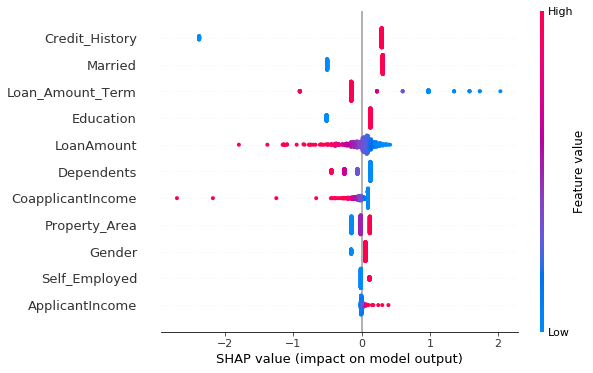

In [67]:
shap.summary_plot(shap_values, X_train) # Why these important variable and what is the impact?  Why are these variables important.  Story tell.

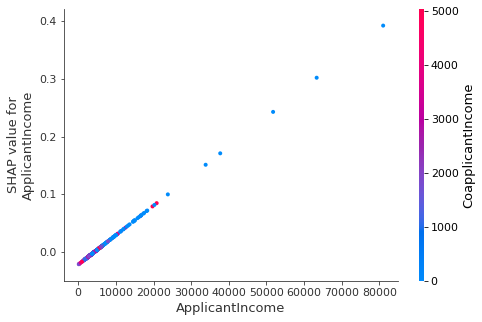

In [68]:
shap.dependence_plot("ApplicantIncome", shap_values, X_train) # Perfect linearity

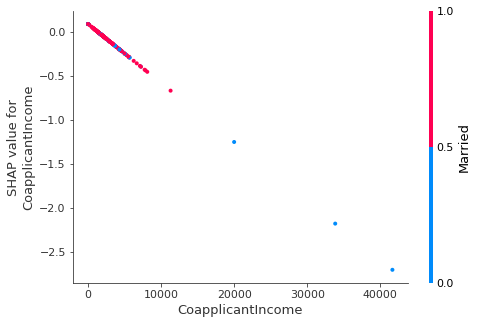

In [69]:
shap.dependence_plot("CoapplicantIncome", shap_values, X_train) # Perfect linearity

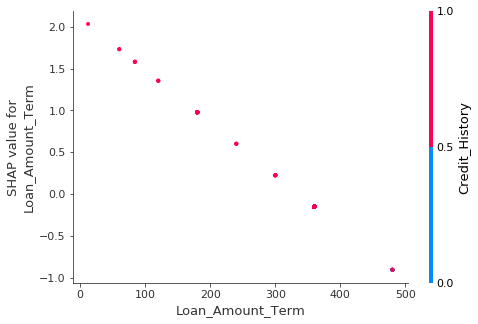

In [70]:
shap.dependence_plot("Loan_Amount_Term", shap_values, X_train) # Perfect linearity

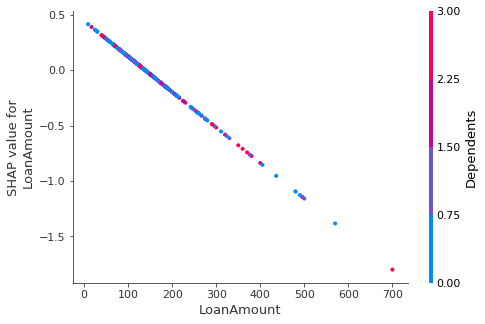

In [71]:
shap.dependence_plot("LoanAmount", shap_values, X_train) # Perfect linearity

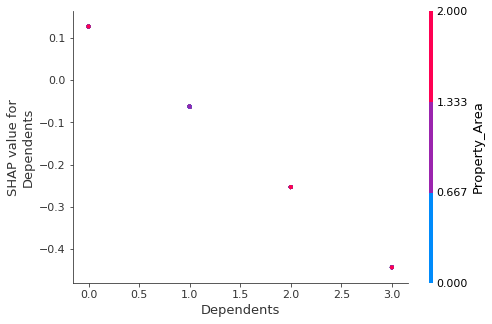

In [72]:
shap.dependence_plot("Dependents", shap_values, X_train) # Perfect linearity

### Predicting the loan status

In [73]:
pred_y = Model.predict(y_train)
pred_y # As expected, This array represents the predicted target variable from the y_train data information.

array([1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.])

In [74]:
accuracy_score(y_test, pred_y) # From this model, an accuracy score of over 82% obtained.

0.8

Accuracy of logistic regression classifier on test set: 0.80

Confusion matrix: 
 [[ 26  32]
 [  5 122]]

Classification report: 
               precision    recall  f1-score   support

         0.0       0.84      0.45      0.58        58
         1.0       0.79      0.96      0.87       127

    accuracy                           0.80       185
   macro avg       0.82      0.70      0.73       185
weighted avg       0.81      0.80      0.78       185



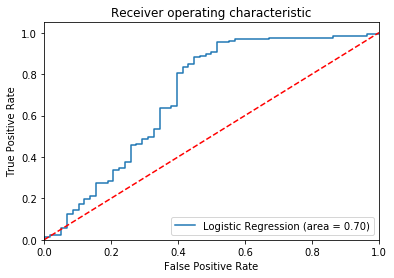

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
run_regression_accuracy(X_train, X_test, y_train, y_test) # This is the accuracy score generated from the function created above.

It was good to quantize as many variables as possible as opposed to employing dummy variables.  If I turned these variables into dummy variables, there would be more features.  The LogisticRegression Model with the highest accuracy score and AUC value would be around 0.78 and the AUC value around 0.70 at a C parameter value of 0.1, which makes sense since some regularaization strength is needed with the increased features due to dummy variables.  By quantizing as many binary variables first, the LogisticRegression models look a little better with the highest accuracy score at around 0.81 to 0.82 and AUC scores 0.73 to 0.74 from  for C parameters of 1 to 1000.  As C decreases so does the AUC and accuracy score meaning that lower regularization strength is needed.

I took a separate jupyter notebook and quantized the property_area instead of replacing it with dummy variables.  There is a spectrum from low urban to high urban from 0 to 2, might add meaning to the CHAP values on property area or extent of urbanization.

By quantizing property_area as opposed to using it as a dummy variable, it was found that the better models (AUC = 0.7 and the accuracy score = 0.79) were found when C = 10.  This means that there because there were less features with the way the property_area variable was treated, regularization would make the models worse typically with data where many of the variables have a linear dependency on the target variable as illustrated with the CHAP value graphs. 

## Employing StratifiedkFold

In [76]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

In [77]:
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True) # This will split the data up into 5 sets where each set is representable.

n1 of Kfold5
accuracy score = 0.8048780487804879


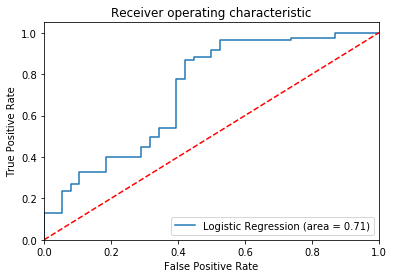

n2 of Kfold5
accuracy score = 0.8373983739837398


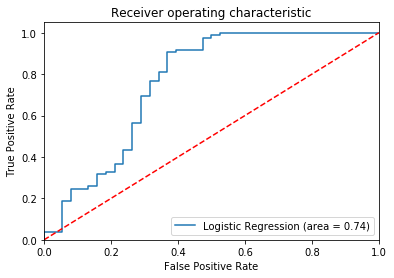

n3 of Kfold5
accuracy score = 0.7967479674796748


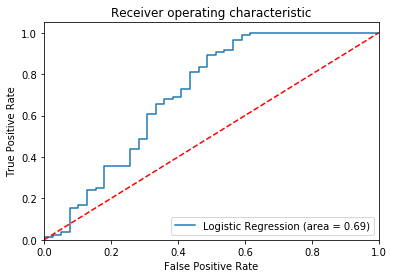

n4 of Kfold5
accuracy score = 0.8130081300813008


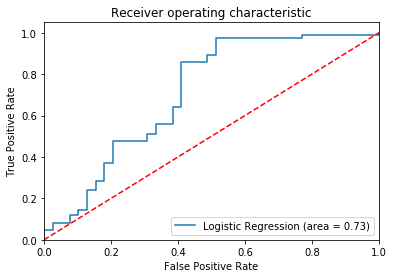

n5 of Kfold5
accuracy score = 0.7950819672131147


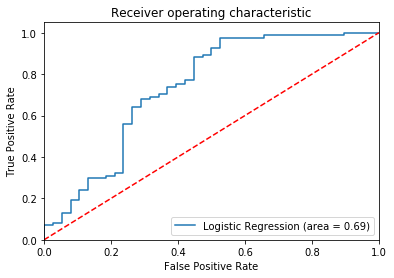

In [78]:
i = 1
for train_index, test_index in kf.split(X, y):
    print('n{} of Kfold{}'.format(i, kf.n_splits))
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = LogisticRegression(random_state = 1)
    model.fit(X_train, y_train)
    pred_test = model.predict(X_test)
    score = accuracy_score(y_test, pred_test)
    print('accuracy score = {}'.format(score))
    
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    i+=1
    

A Logistic Regression was carried out here by shuffling the dataset so that each dataset is a representative piece of the whole data.  For example, there about a 1:5 ration for female:male applicants.  Each k fold in the model above contains the same ratio of female:male applicants.  This is important because of possible underlying correlations between gender and some of the other features like self_employed and married.
            


Each k fold had an accuracy score ranging from 0.79 to 0.84 with ROC values ranging from 0.69 to 0.74.  According to these metrics, shuffling the data does make a difference.

## Feature Engineering: Replacing Applicant and Co-applicant income with a total income bin

In The EDA, a relationship between loan_status and total_income was observed.  Applicants with a low total income bin stand a significantly lower chance at getting approved.  So, the same two models will be run by replacing the income columns with the binned total income column created and dropped above.  Let's see if the ROC values and accuracy scores change with this newly designed X variable.

In [79]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
X['Total_Income_bin'] = X['ApplicantIncome'] + X['CoapplicantIncome']
X['Total_Income_bin'] = pd.cut(X['Total_Income_bin'], bins, labels = group)
X = X.drop(['ApplicantIncome', 'CoapplicantIncome'], axis = 1)
X = pd.get_dummies(X) # Once the Total Income bin was added, like property area, it was transformed into numerical entries of 1's and 0's for all 4 classes.

In [80]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income_bin_Low,Total_Income_bin_Average,Total_Income_bin_High,Total_Income_bin_Very High
0,1.0,0.0,0.0,1.0,0.0,128.0,360.0,1.0,2.0,0,0,1,0
1,1.0,1.0,1.0,1.0,0.0,128.0,360.0,1.0,0.0,0,0,0,1
2,1.0,1.0,0.0,1.0,1.0,66.0,360.0,1.0,2.0,0,1,0,0
3,1.0,1.0,0.0,0.0,0.0,120.0,360.0,1.0,2.0,0,0,1,0
4,1.0,0.0,0.0,1.0,0.0,141.0,360.0,1.0,2.0,0,0,1,0


In [81]:
X = X.drop(['Total_Income_bin_Very High'], axis = 1)

Now the we have our new X table, lets run it thought some models and observe any differences if possible.

In [82]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.3) # Using test_train_split to create modified variables for the models.

In [83]:
X_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Total_Income_bin_Low', 'Total_Income_bin_Average',
       'Total_Income_bin_High'],
      dtype='object')

Accuracy of logistic regression classifier on test set: 0.81

Confusion matrix: 
 [[ 26  32]
 [  3 124]]

Classification report: 
               precision    recall  f1-score   support

         0.0       0.90      0.45      0.60        58
         1.0       0.79      0.98      0.88       127

    accuracy                           0.81       185
   macro avg       0.85      0.71      0.74       185
weighted avg       0.83      0.81      0.79       185



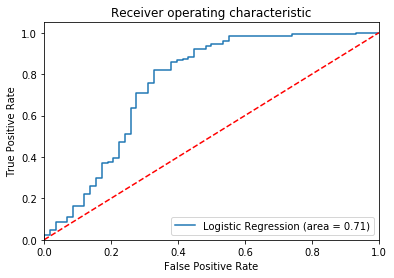

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
run_regression_accuracy(X_train, X_test, y_train, y_test)

The LogisticRegression model improved through this feature engineering process.

n1 of Kfold5
accuracy score = 0.8130081300813008


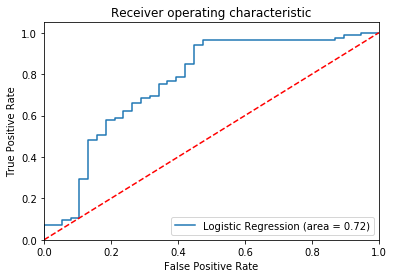

n2 of Kfold5
accuracy score = 0.8373983739837398


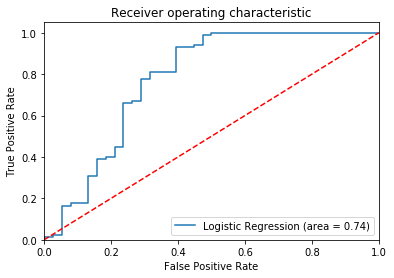

n3 of Kfold5
accuracy score = 0.8130081300813008


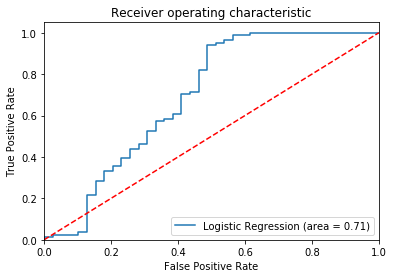

n4 of Kfold5
accuracy score = 0.8048780487804879


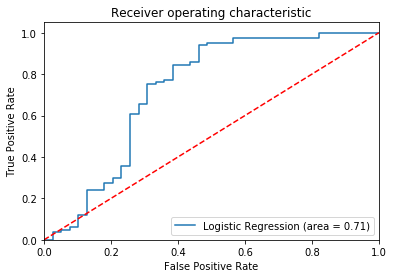

n5 of Kfold5
accuracy score = 0.7868852459016393


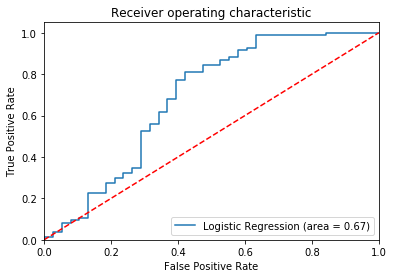

In [85]:
i = 1
for train_index, test_index in kf.split(X, y):
    print('n{} of Kfold{}'.format(i, kf.n_splits))
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = LogisticRegression(random_state = 1)
    model.fit(X_train, y_train)
    pred_test = model.predict(X_test)
    score = accuracy_score(y_test, pred_test)
    print('accuracy score = {}'.format(score))
    
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    i+=1

The first logistic regression model performed about the same with this new feature.  The LogisticRegression model performs best after the feature engineering with a C value of between 0.1 and 10.  The accuracy scores between 0.80 and 0.82 and the AUC score of between 0.71 to 0.72.  The second model where the data was shuffled and stratified using StratifiedKfold performed better than the first one without the total income bin.  Accuracy scores for 4 of the 5 folds were above 0.80 while the 5th one was at 0.78 and AUC values of around 0.70 to 0.73.

## XG Boost

In [86]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [87]:
from xgboost import XGBClassifier

In [88]:
XG_Model = XGBClassifier()
XG_Model.fit(X_train, y_train)
print(XG_Model)

[15:56:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)


In [89]:
y_Pred = XG_Model.predict(X_test)
predictions = [round(value) for value in y_Pred]

In [90]:
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.7459016393442623


In [91]:
def run_XG_boost(X_train, y_train, X_test, y_test):   
    XG_Model = XGBClassifier()
    XG_Model.fit(X_train, y_train)
    y_pred = XG_Model.predict(X_test)
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(XG_Model.score(X_test, y_test)))
    cm = confusion_matrix(y_test, y_pred)
    print('\nConfusion matrix: \n',cm)

    print('\nClassification report: \n',classification_report(y_test, y_pred))

    logit_roc_auc = roc_auc_score(y_test, XG_Model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, XG_Model.predict_proba(X_test)[:,1])

    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
  
    return XG_Model

[15:56:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of logistic regression classifier on test set: 0.75

Confusion matrix: 
 [[16 22]
 [ 9 75]]

Classification report: 
               precision    recall  f1-score   support

         0.0       0.64      0.42      0.51        38
         1.0       0.77      0.89      0.83        84

    accuracy                           0.75       122
   macro avg       0.71      0.66      0.67       122
weighted avg       0.73      0.75      0.73       122



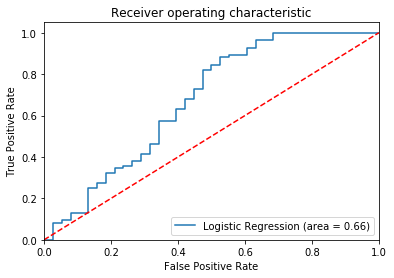

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [92]:
run_XG_boost(X_train, y_train, X_test, y_test) # New feature case scenario.

This is not a suitable model for this data as seen by a lower AUC score (0.66) and accuracy_score = 0.75.  This is an indication that there are linear relationships between the independnet variables and the target variable.

In [93]:
from sklearn import tree

n1 of Kfold5
accuracy score = 0.6747967479674797


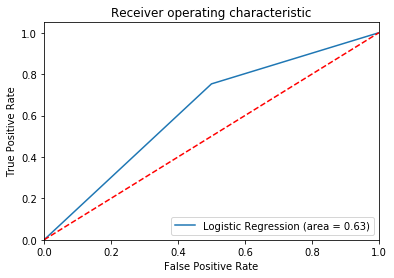

n2 of Kfold5
accuracy score = 0.6910569105691057


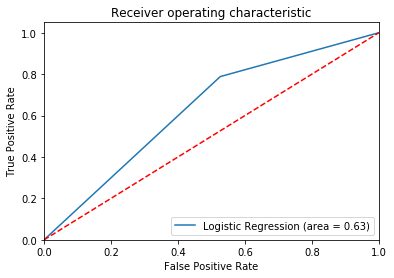

n3 of Kfold5
accuracy score = 0.6504065040650406


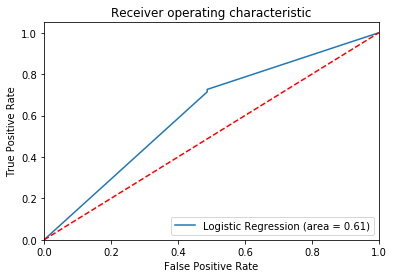

n4 of Kfold5
accuracy score = 0.6829268292682927


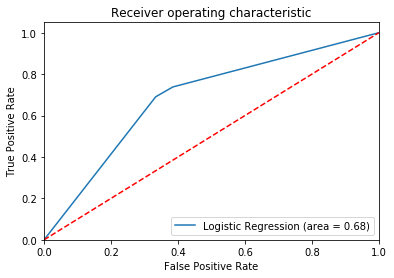

n5 of Kfold5
accuracy score = 0.6557377049180327


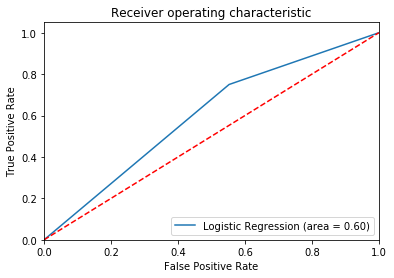

In [94]:
i = 1
for train_index, test_index in kf.split(X, y):
    print('n{} of Kfold{}'.format(i, kf.n_splits))
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = tree.DecisionTreeClassifier(random_state = 1)
    model.fit(X_train, y_train)
    pred_test = model.predict(X_test)
    score = accuracy_score(y_test, pred_test)
    print('accuracy score = {}'.format(score))
    
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    i+=1

In [95]:
from sklearn.ensemble import RandomForestClassifier

n1 of Kfold5
accuracy score = 0.8048780487804879


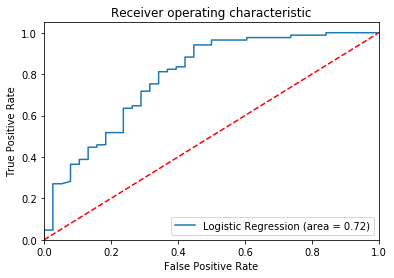

n2 of Kfold5
accuracy score = 0.8292682926829268


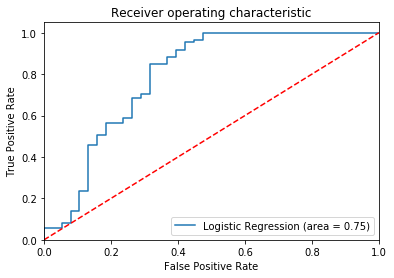

n3 of Kfold5
accuracy score = 0.8130081300813008


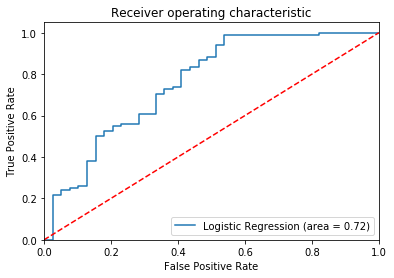

n4 of Kfold5
accuracy score = 0.7886178861788617


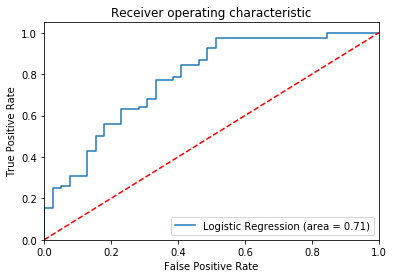

n5 of Kfold5
accuracy score = 0.7786885245901639


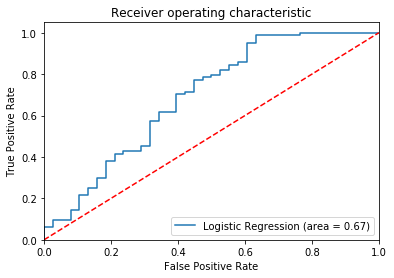

In [96]:
i = 1
for train_index, test_index in kf.split(X, y):
    print('n{} of Kfold{}'.format(i, kf.n_splits))
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = RandomForestClassifier(random_state = 1, max_depth = 10)
    model.fit(X_train, y_train)
    pred_test = model.predict(X_test)
    score = accuracy_score(y_test, pred_test)
    print('accuracy score = {}'.format(score))
    
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    i+=1

# Performng Grid Search With Random Forest Classifier

In [97]:
from sklearn.model_selection import RandomizedSearchCV

In [98]:
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search = RandomizedSearchCV(RandomForestClassifier(random_state=1), paramgrid) # Could do a RandomizedSearchCV to save computing.
grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [99]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=41,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

n1 of Kfold5
accuracy score = 0.8130081300813008


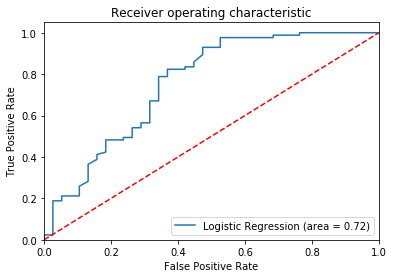

n2 of Kfold5
accuracy score = 0.8373983739837398


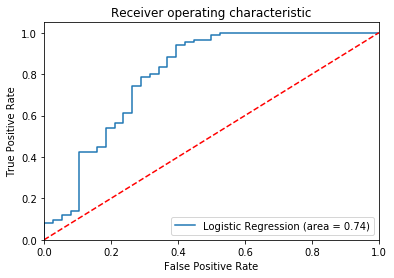

n3 of Kfold5
accuracy score = 0.7967479674796748


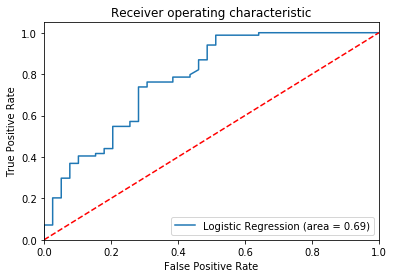

n4 of Kfold5
accuracy score = 0.8048780487804879


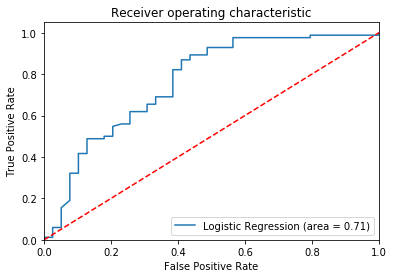

n5 of Kfold5
accuracy score = 0.7950819672131147


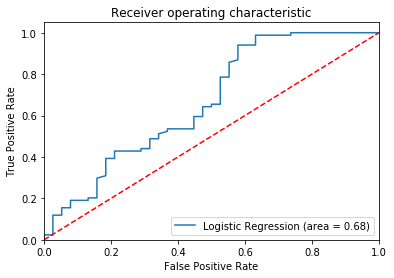

In [100]:
i = 1
for train_index, test_index in kf.split(X, y):
    print('n{} of Kfold{}'.format(i, kf.n_splits))
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = grid_search.best_estimator_
    model.fit(X_train, y_train)
    pred_test = model.predict(X_test)
    score = accuracy_score(y_test, pred_test)
    print('accuracy score = {}'.format(score))
    
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    i+=1

It looks like a randomforest classifier and a logistic regression are the two best models.  Before wrangling the testing data,
lets rebuild our two models and see which one is the best by using sklearn and use cross_val_score.  Then observe the chap values from the two best estimators.

In [101]:
from sklearn.model_selection import cross_val_score

In [102]:
Cross_validation_results = cross_val_score(Model, X, y, cv=5, scoring = 'roc_auc')
Cross_validation_results
print('Mean AUC Score of Cross_validation Results is: {}'.format(np.mean(Cross_validation_results)))

Mean AUC Score of Cross_validation Results is: 0.750846913664251


## Putting It All Together

In [103]:
from sklearn.metrics import roc_curve

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Total_Income_bin_Low', 'Total_Income_bin_Average',
       'Total_Income_bin_High'],
      dtype='object')

In [105]:
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid) # Could do a RandomizedSearchCV to save computing.
grid_search.fit(X_train, y_train)

NameError: name 'GridSearchCV' is not defined

In [ ]:
y_pred_prob = grid_search.best_estimator_.predict_proba(X_test)[:,1] # This is the best random forest model
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
paramgrid = {'C': np.logspace(-8, 5, 15)}
grid_search = RandomizedSearchCV(LogisticRegression(), paramgrid) # Could do a RandomizedSearchCV to save computing.
grid_search.fit(X_train, y_train)

In [ ]:
y_pred_prob = grid_search.best_estimator_.predict_proba(X_test)[:,1] # This is the best random forest model
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()